In [1]:
# imports

%matplotlib inline
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

sys.path.append('../../pyVisOS/')
sys.path.append('../')
import osh5def
import osh5io
import osh5vis
import osh5utils

import Plot

In [70]:
# clear previous diagnostics
os.system('rm -rf MS/ TIMINGS/')

# run osiris simulation
os.system('../../osiris/bin/osiris-1D.e moving_plasma_long.1d')

 Osiris running on host avrutskys-mbp
 Current working directory = /Users/avrutsky/College/Lab/simulations/moving plasma long
 Timer resolution is    2.3000000000000001E-008  seconds
 
 ***************************************************************
 *          Using double precision AVX optimized Code          *
 ***************************************************************
 
 Software revision: r4f85ea0
 
 
 Reading input file, full name: moving_plasma_long.1d
 
 Reading global simulation options... 
 Reading parallel node configuration... 
 Reading grid configuration...
 cartesian coordinates
 Reading tstep configuration... 
 Reading restart configuration... 
 Reading g_space configuration... 
 Reading time configuration... 
 Reading emf configuration... 
  - no smoothing specified
 Reading part configuration... 
 - species (1) configuration...
    Species name : electrons
 Reading zpulses ... 
  - Reading zpulse configuration...
 Reading current configuration...
  - no smoothing 

0

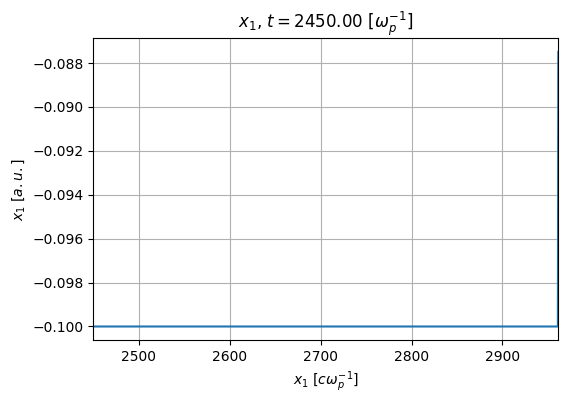

In [3]:
# plasma distribution

fig, ax = plt.subplots(1,1, dpi=100)
Plot.x(ax, 'x1-electrons-005000.h5');
#Plot.x_scatter(ax, 'x1-electrons-005000.h5', s=1);
#d = osh5io.read_h5('x1-electrons-000000.h5', 'MS/PHA/x1/electrons/')
#print(d.data_attrs)
#print(d.run_attrs)

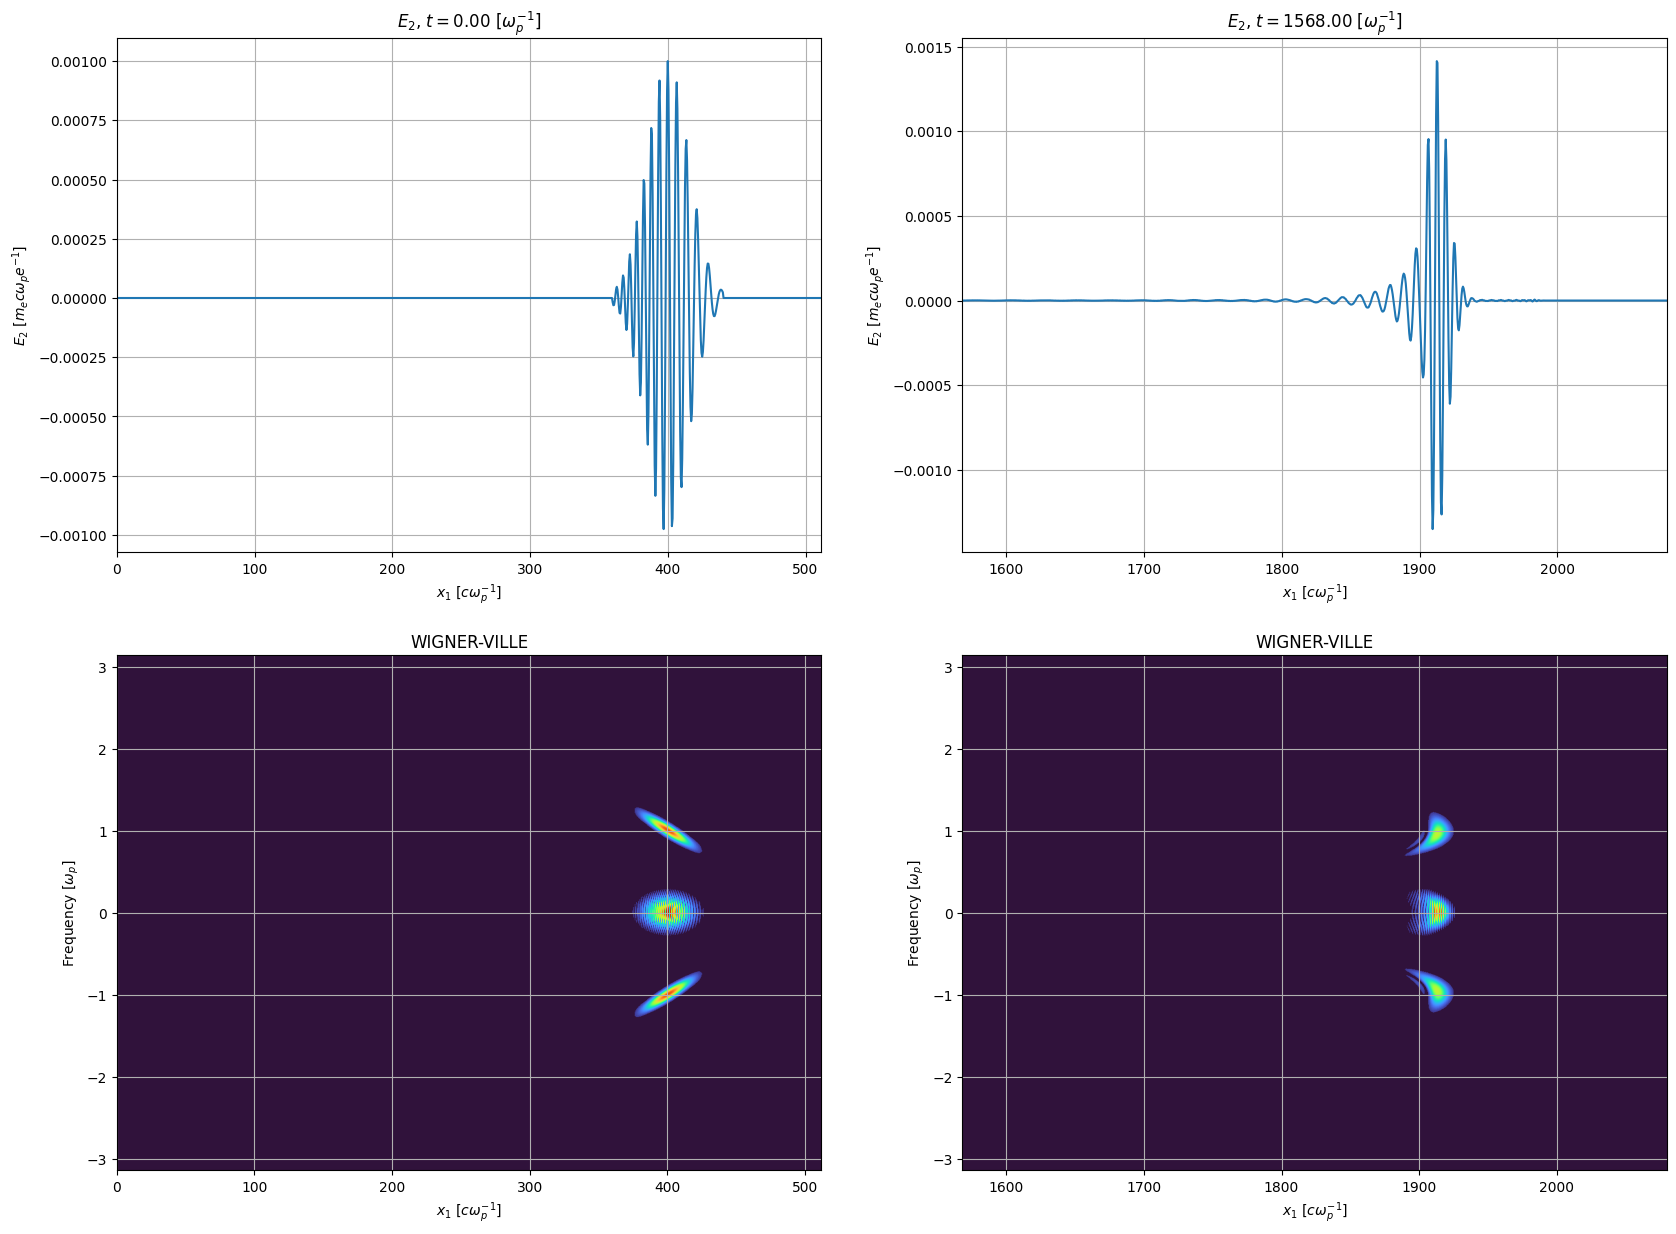

In [2]:
# beginning and end laser pulse + wigner

fig, ax = plt.subplots(2,2, figsize=(20,15), dpi=100)

data1, im1 = Plot.Ex(ax[0,0], 'e2-000000.h5')
data2, _ = Plot.Ex(ax[0,1], 'e2-003200.h5')

Plot.wigner(ax[1,0], 'e2-000000.h5')
Plot.wigner(ax[1,1], 'e2-003200.h5')


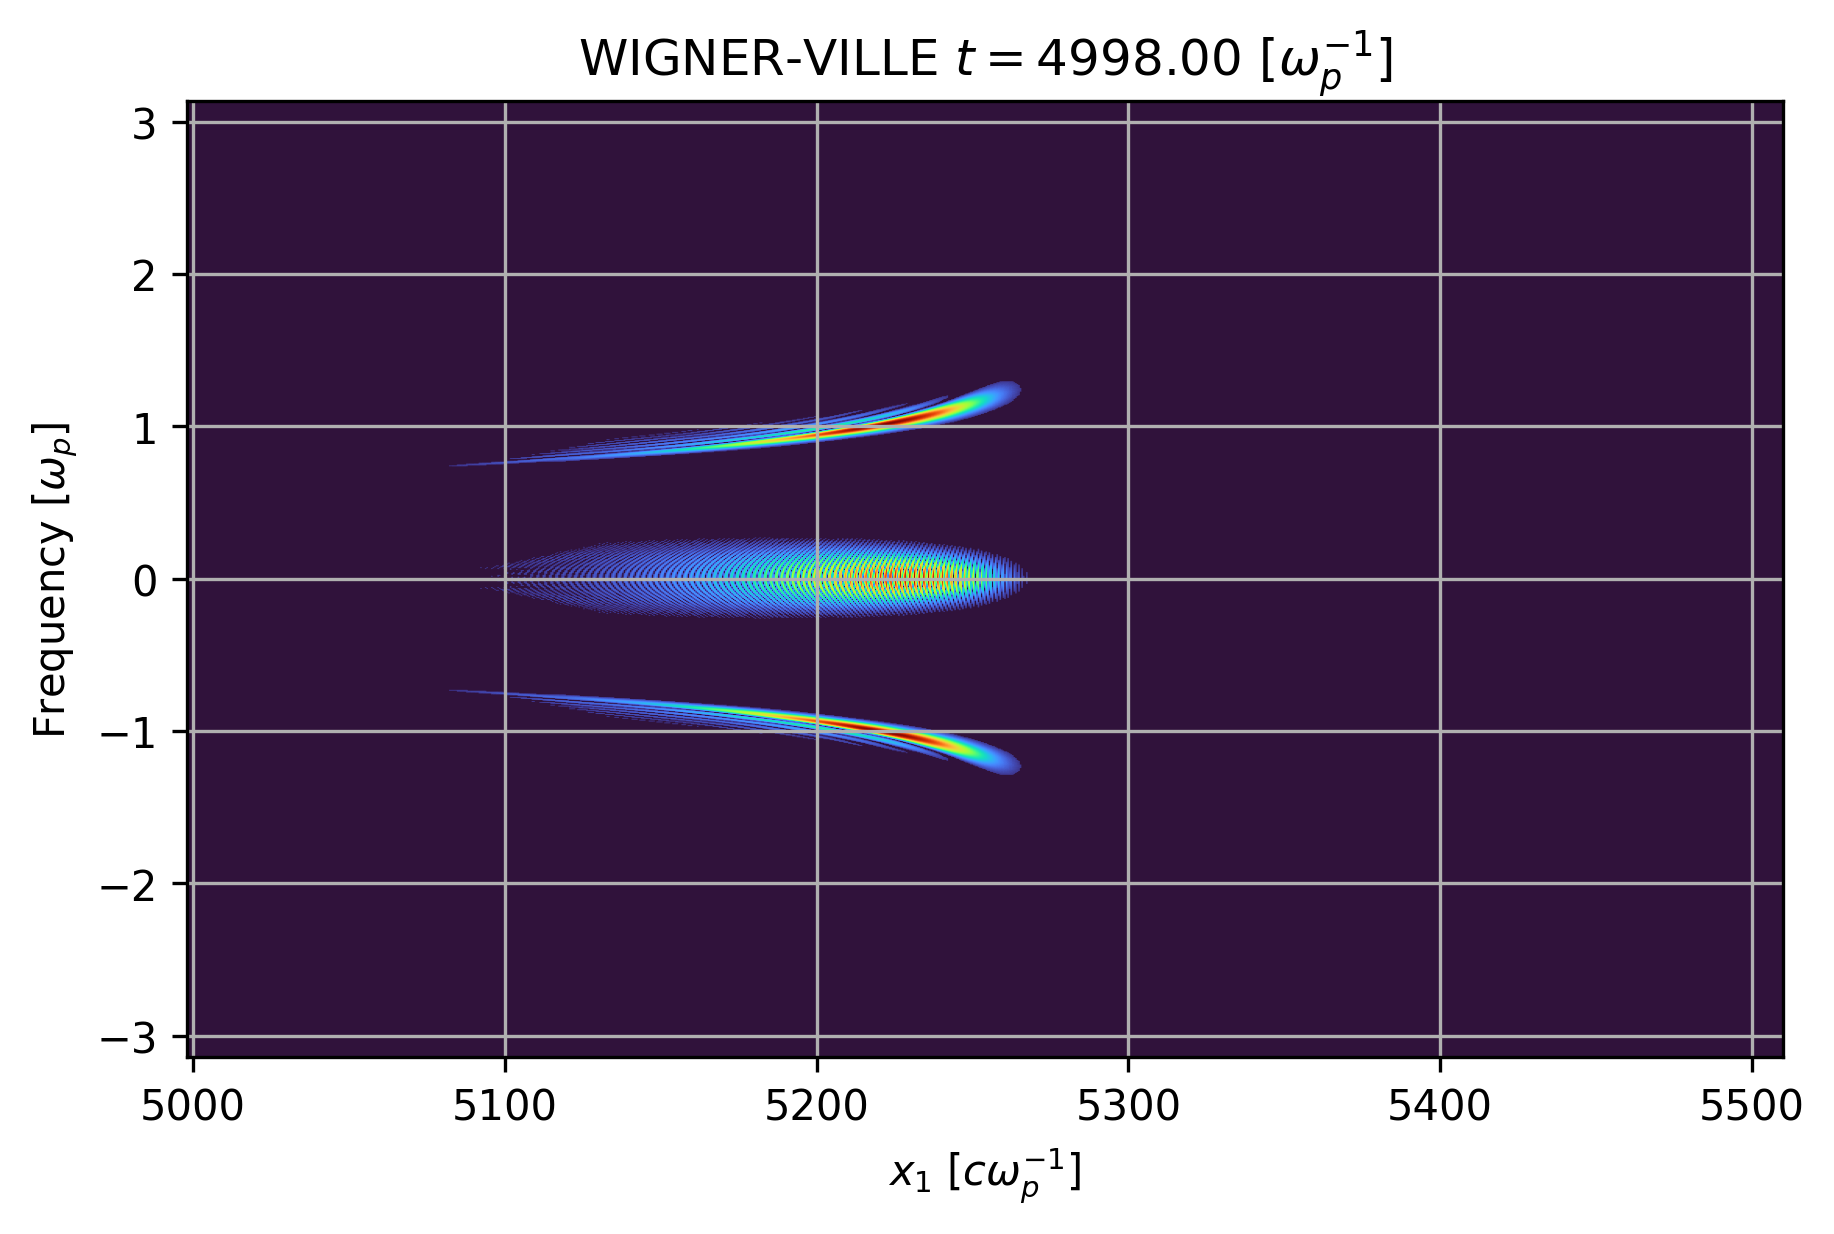

In [3]:
# wigner movie

Plot.wigner_movie('MS/FLD/e2/', 15, 10)

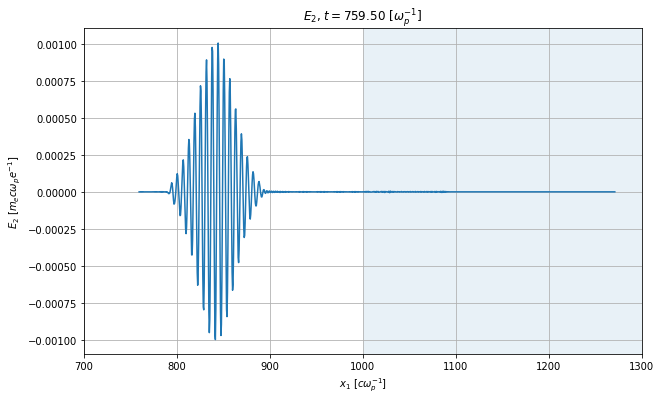

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
Plot.Ex(ax, 'e2-001550.h5', xlim=[700,1300])
ax.axvspan(1000,4000, alpha=0.1)

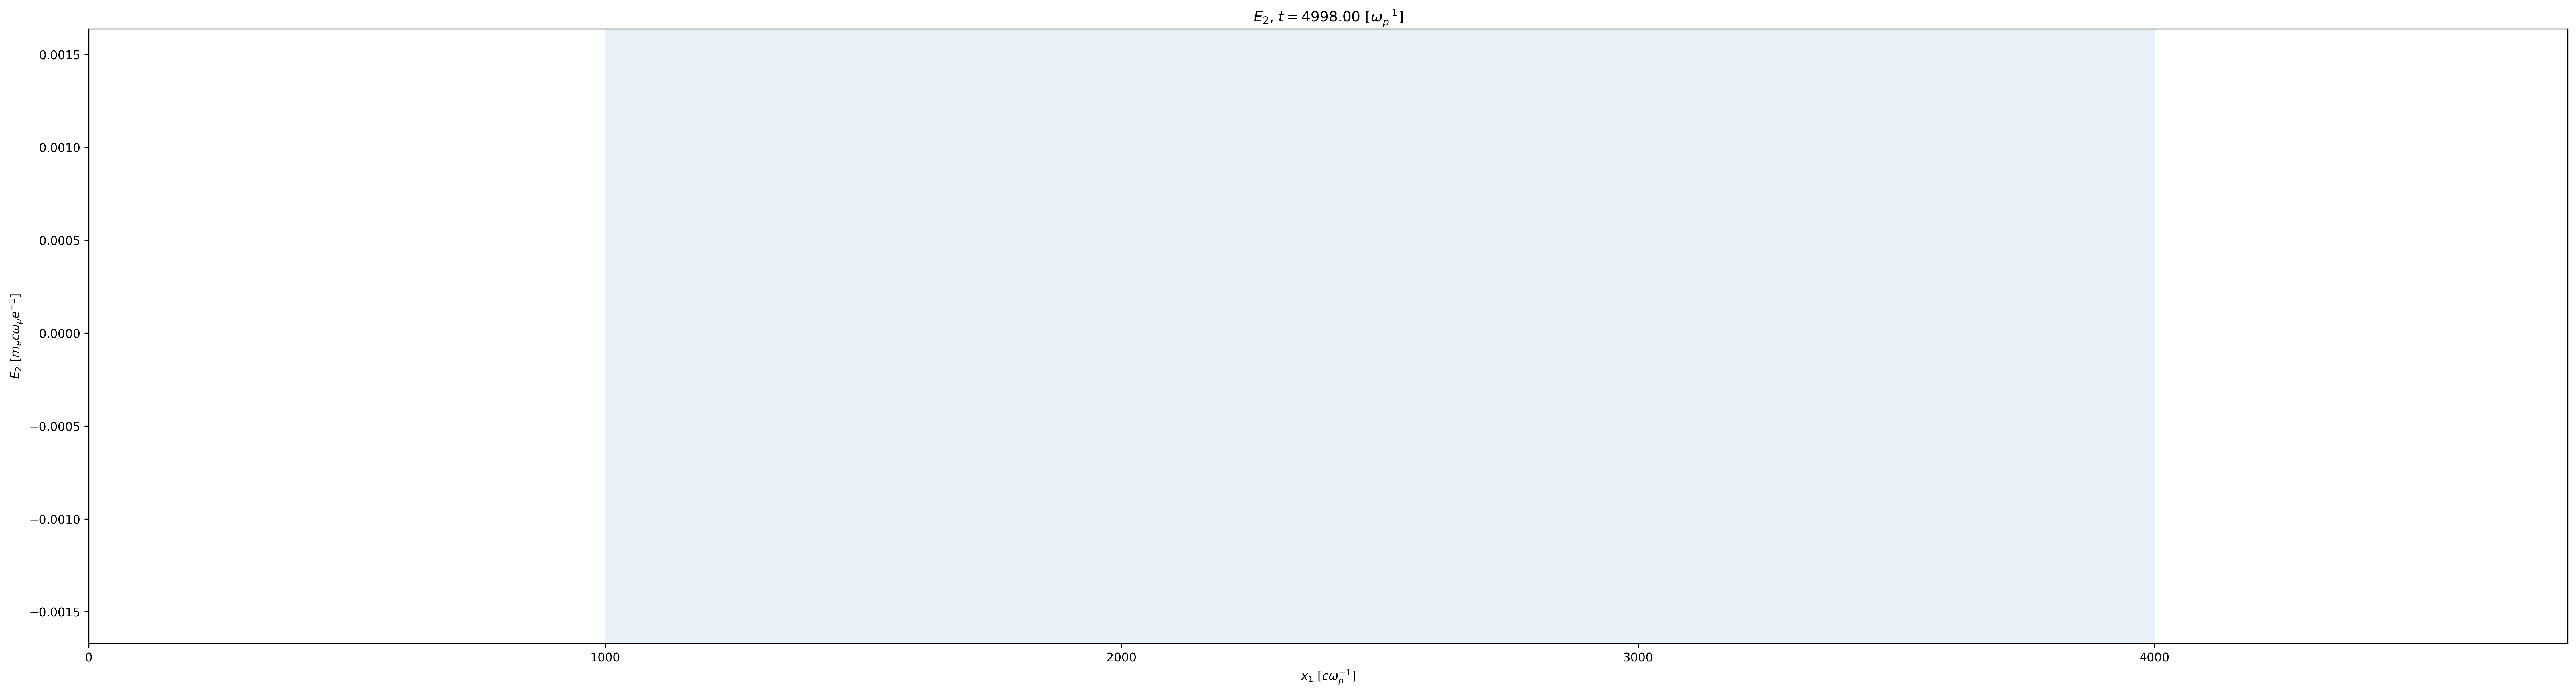

In [74]:
# movie

Plot.movie('MS/FLD/e2/', 10, 'n 0-1 neg chirp.mp4', (30,8), span=[1000,4000], xlim=[0,4800])

[(-2.0, 2.0), (0.0, 0.6)]

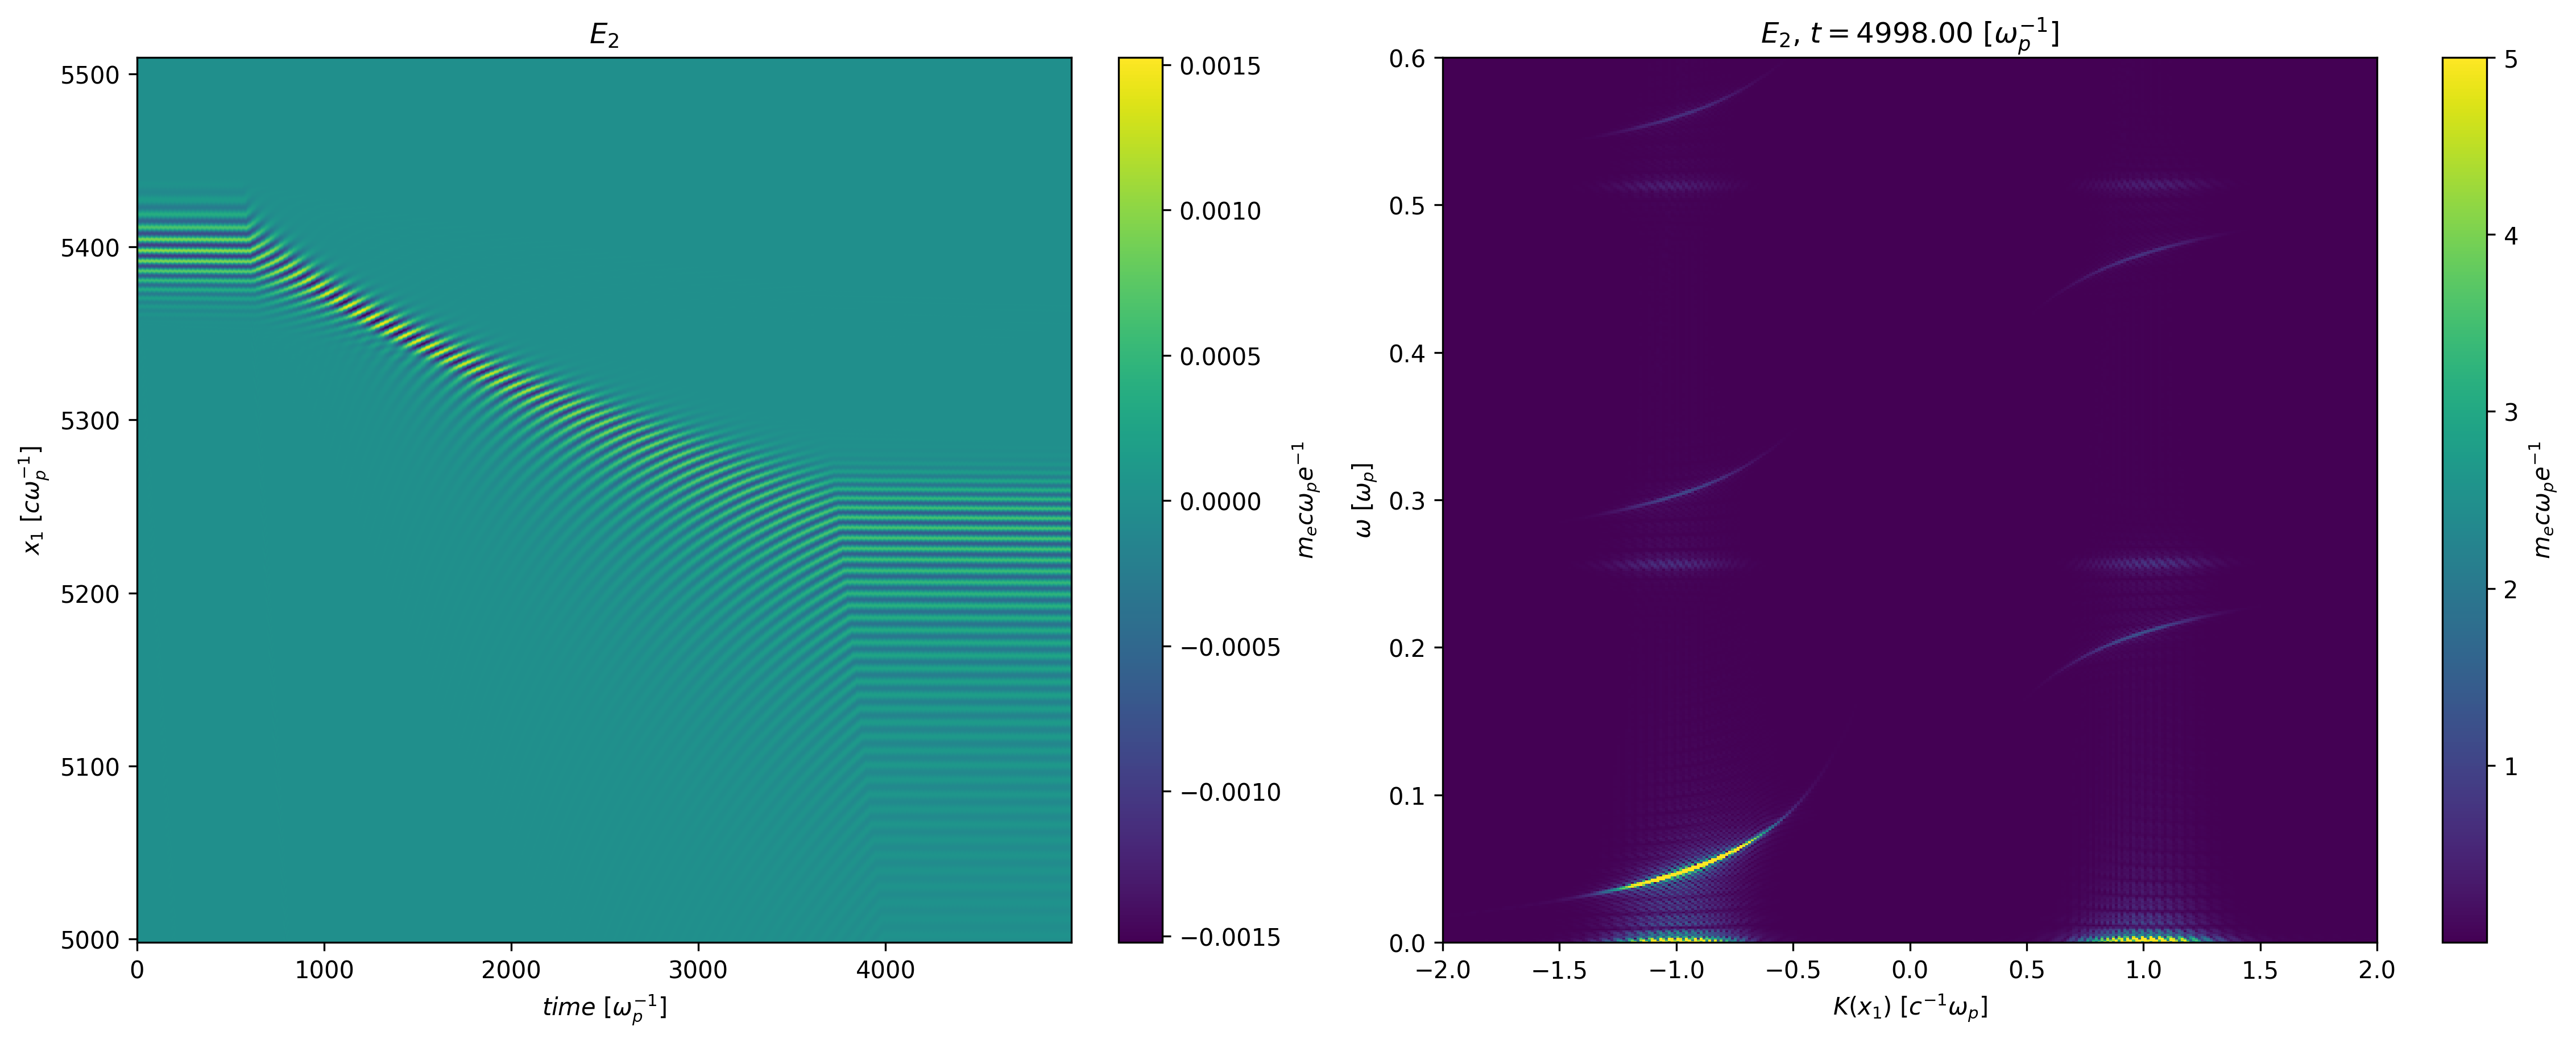

In [76]:
# xt and wk plots

fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=300, constrained_layout=True)
Plot.xt(ax[0], 'e2')
Plot.wk(ax[1], 'e2', vmax=5)
ax[1].set(xlim=[-2,2], ylim=[0, 0.6])
#fig.savefig('VIS/n 0-1 chirp.png', facecolor='white')

[(-2.0, 2.0)]

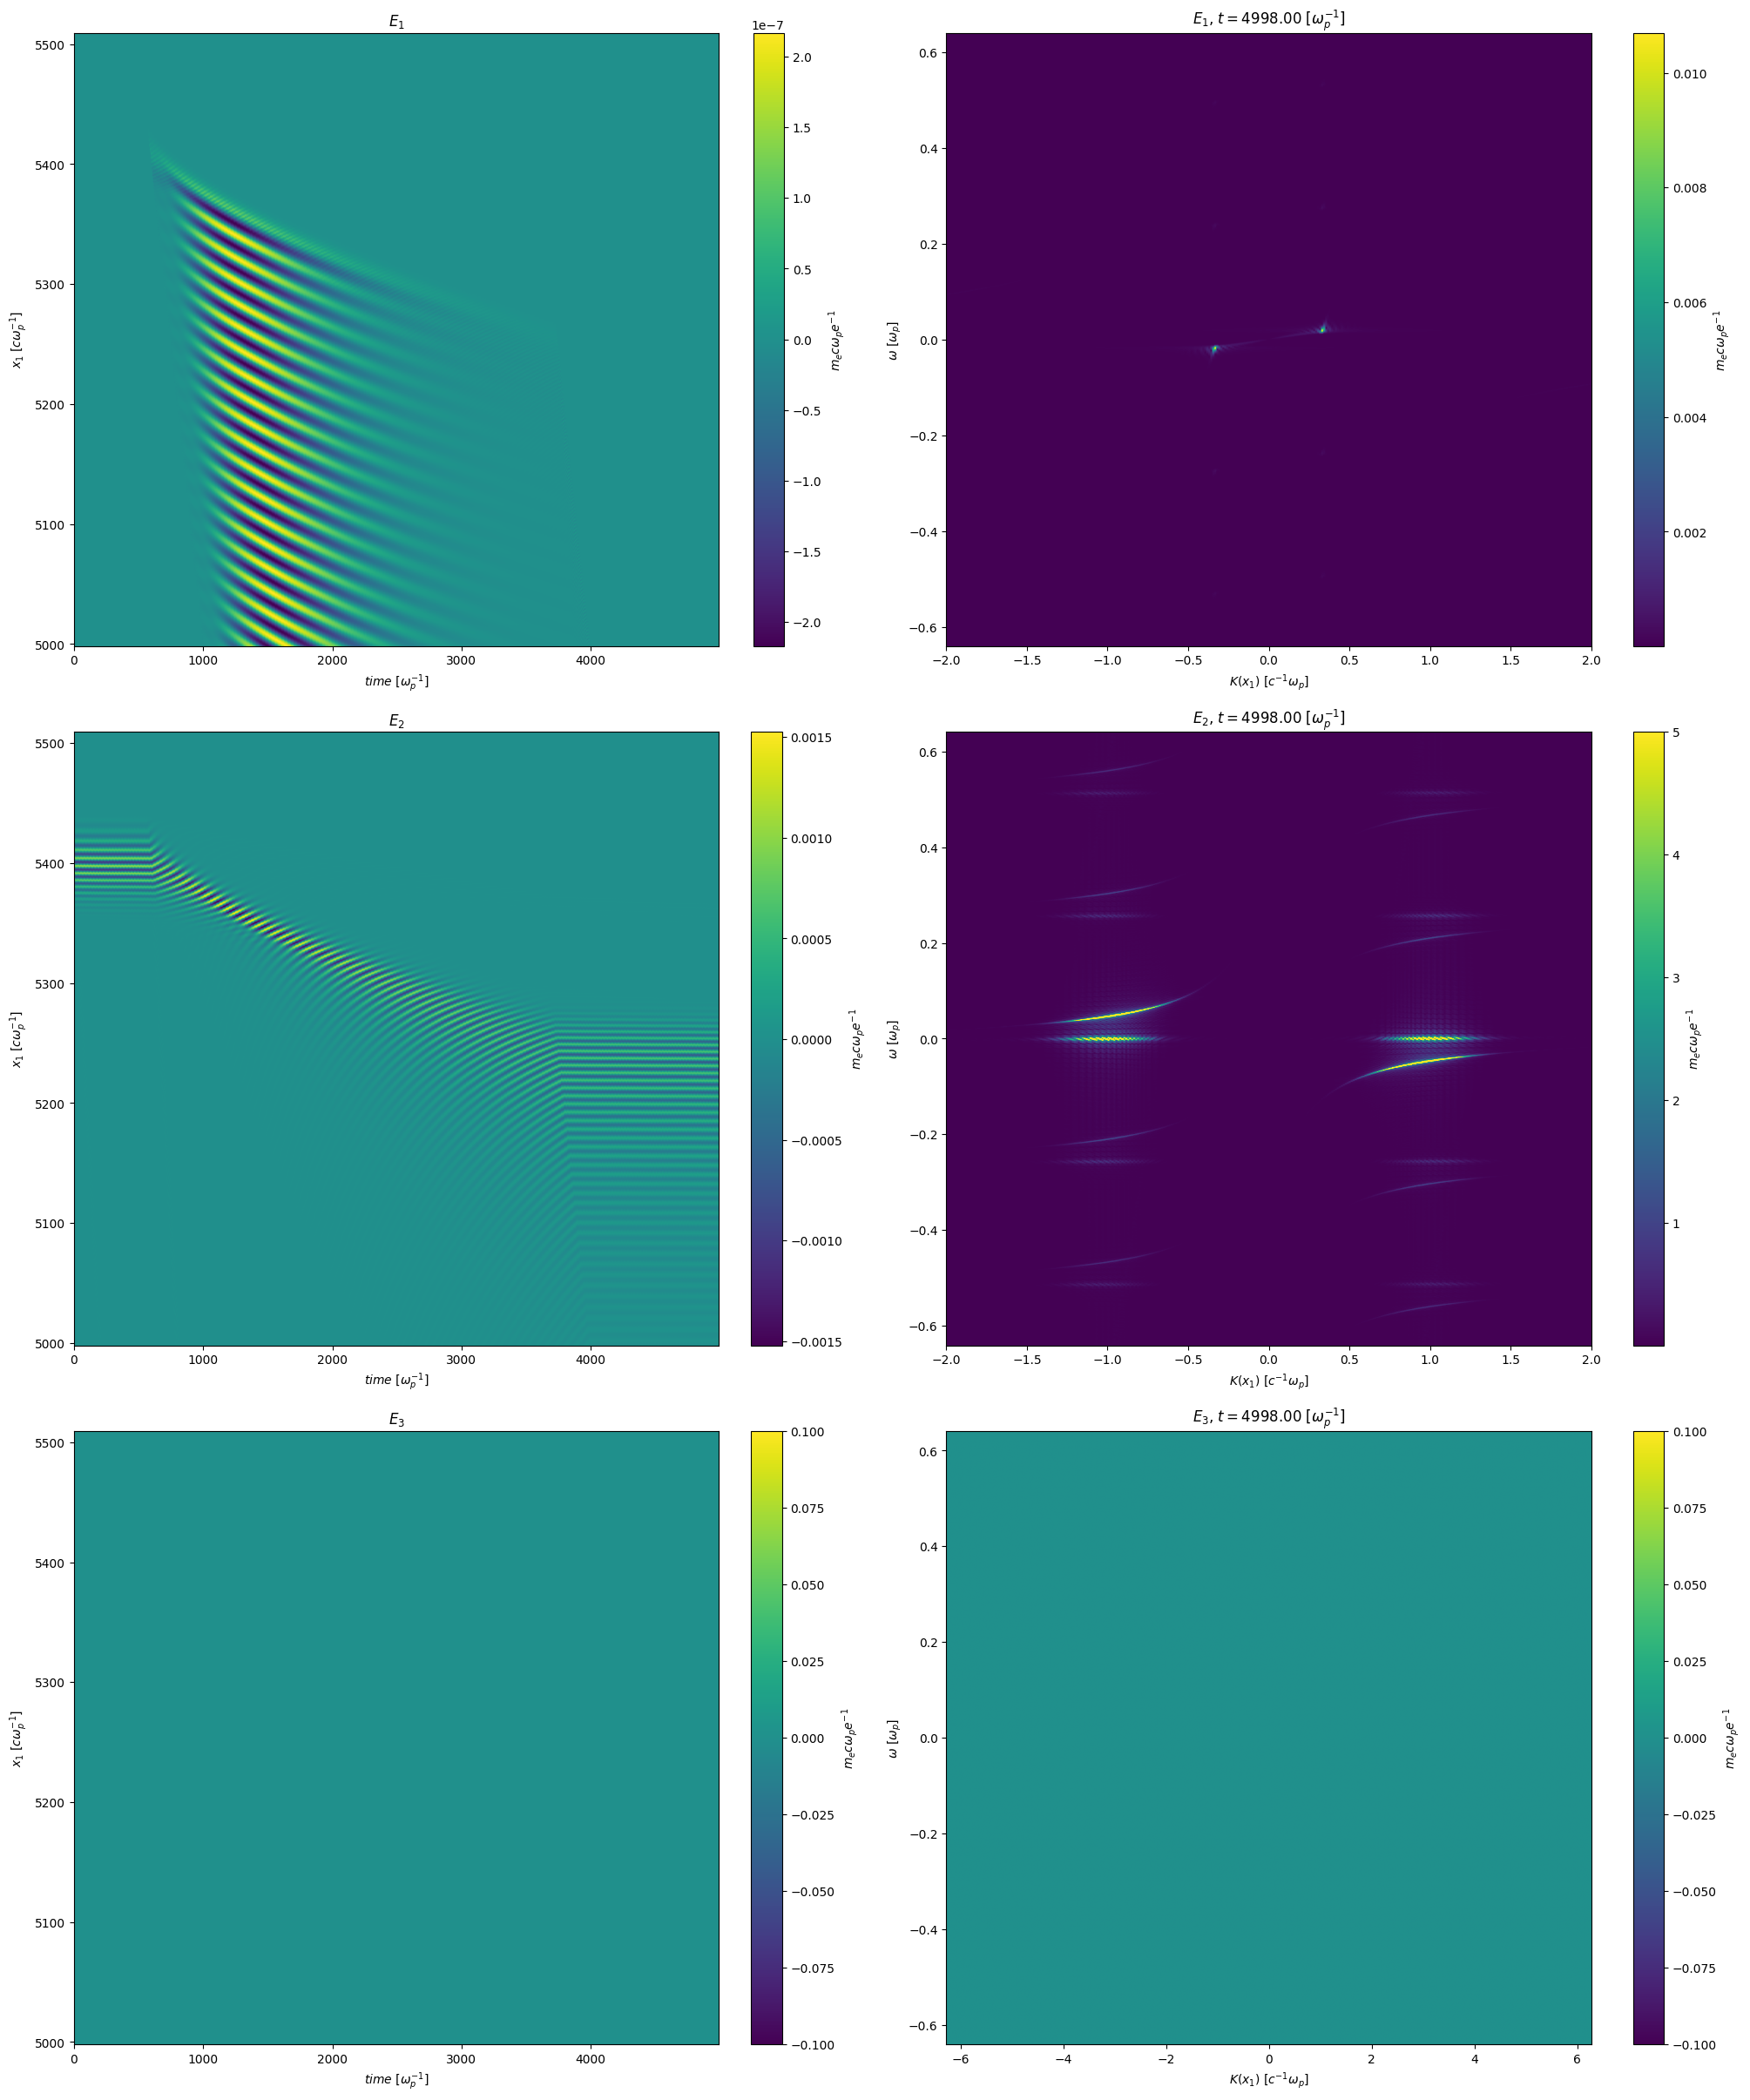

In [84]:
# xt and wk plots of all 3 dimensions

fig, ax = plt.subplots(3,2, dpi=100, figsize=(20,24), constrained_layout=True)
Plot.xt(ax[0,0], 'e1')
Plot.wk(ax[0,1], 'e1')
Plot.xt(ax[1,0], 'e2')
Plot.wk(ax[1,1], 'e2', vmax=5)
Plot.xt(ax[2,0], 'e3')
Plot.wk(ax[2,1], 'e3')

ax[0,1].set(xlim=[-2,2])
ax[1,1].set(xlim=[-2,2])
#fig.savefig('VIS/1-1 all.png', facecolor='white')

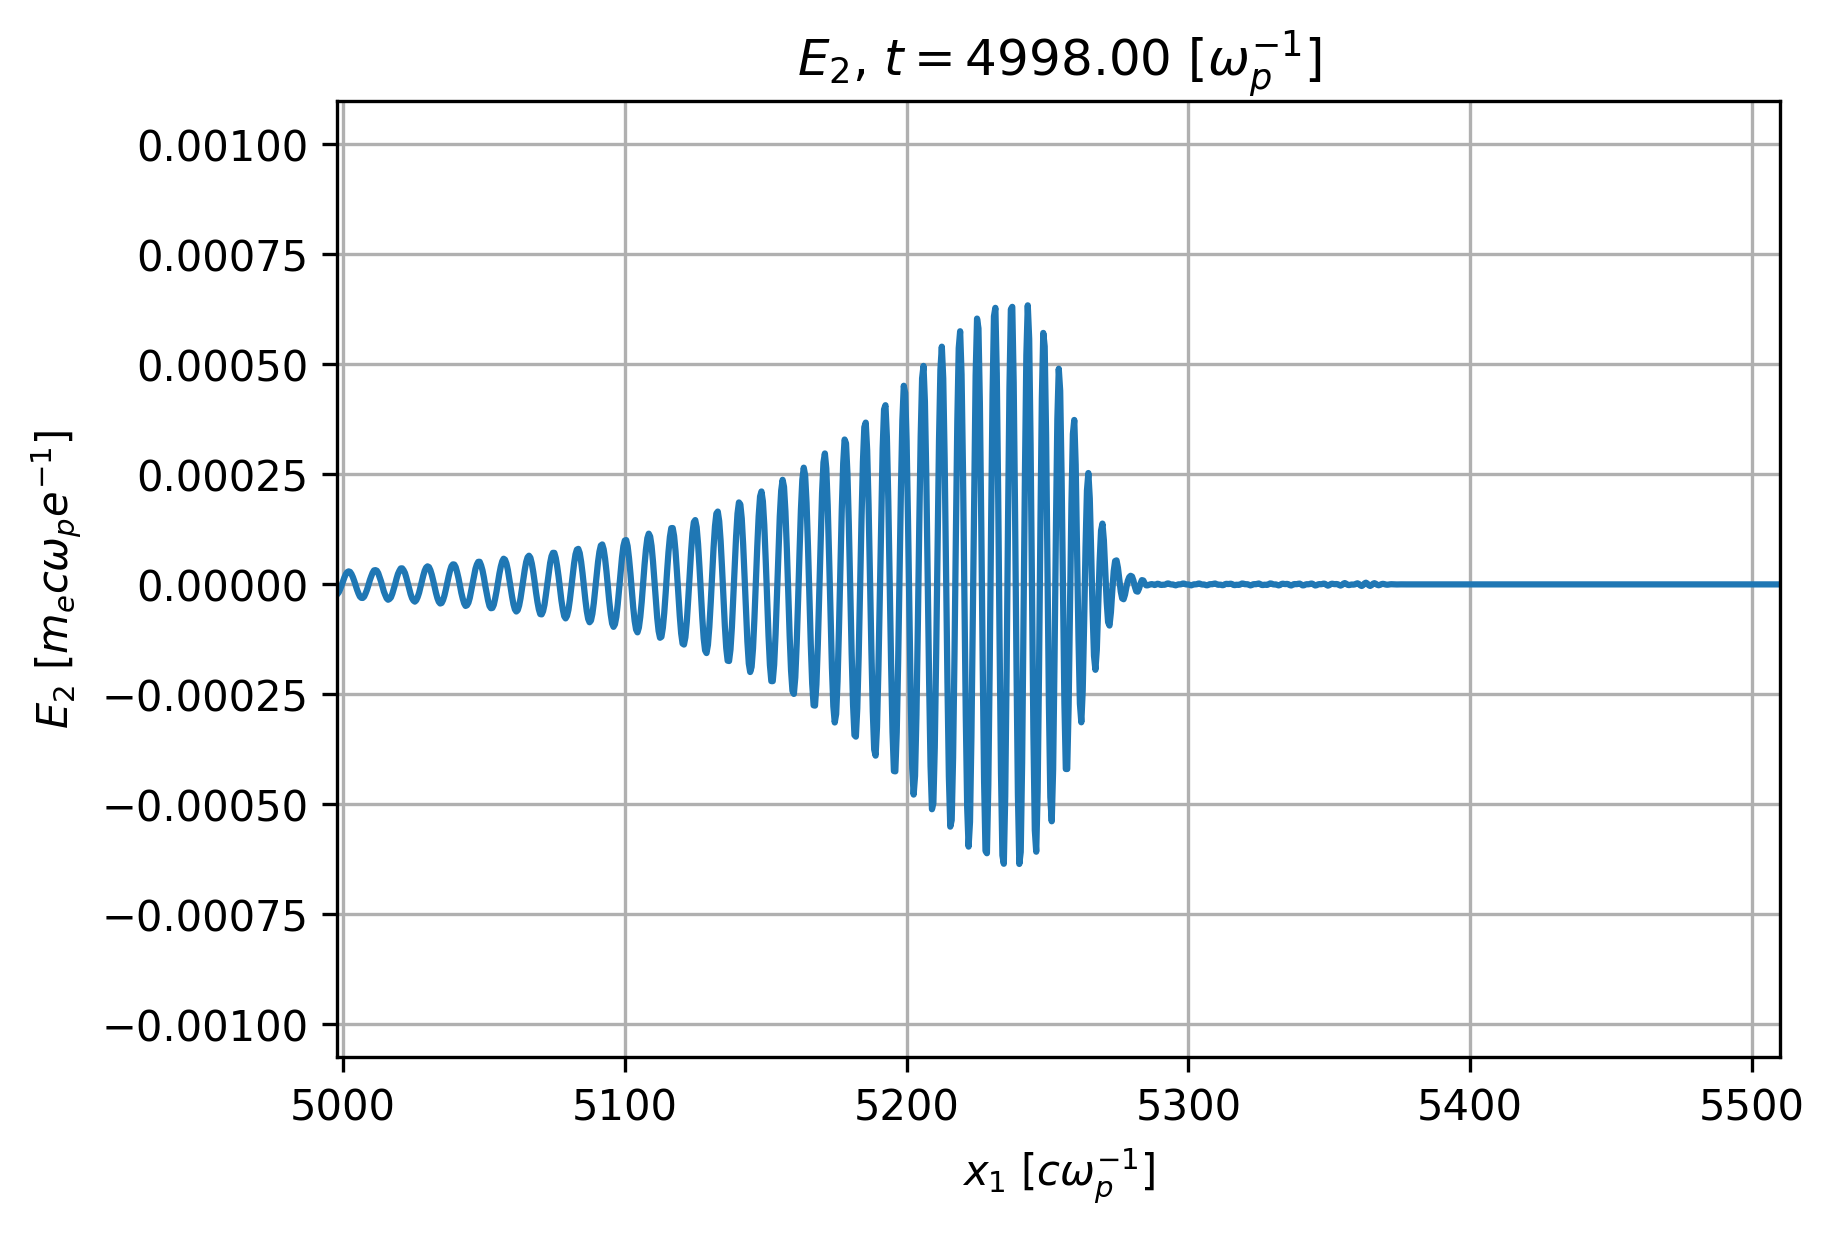

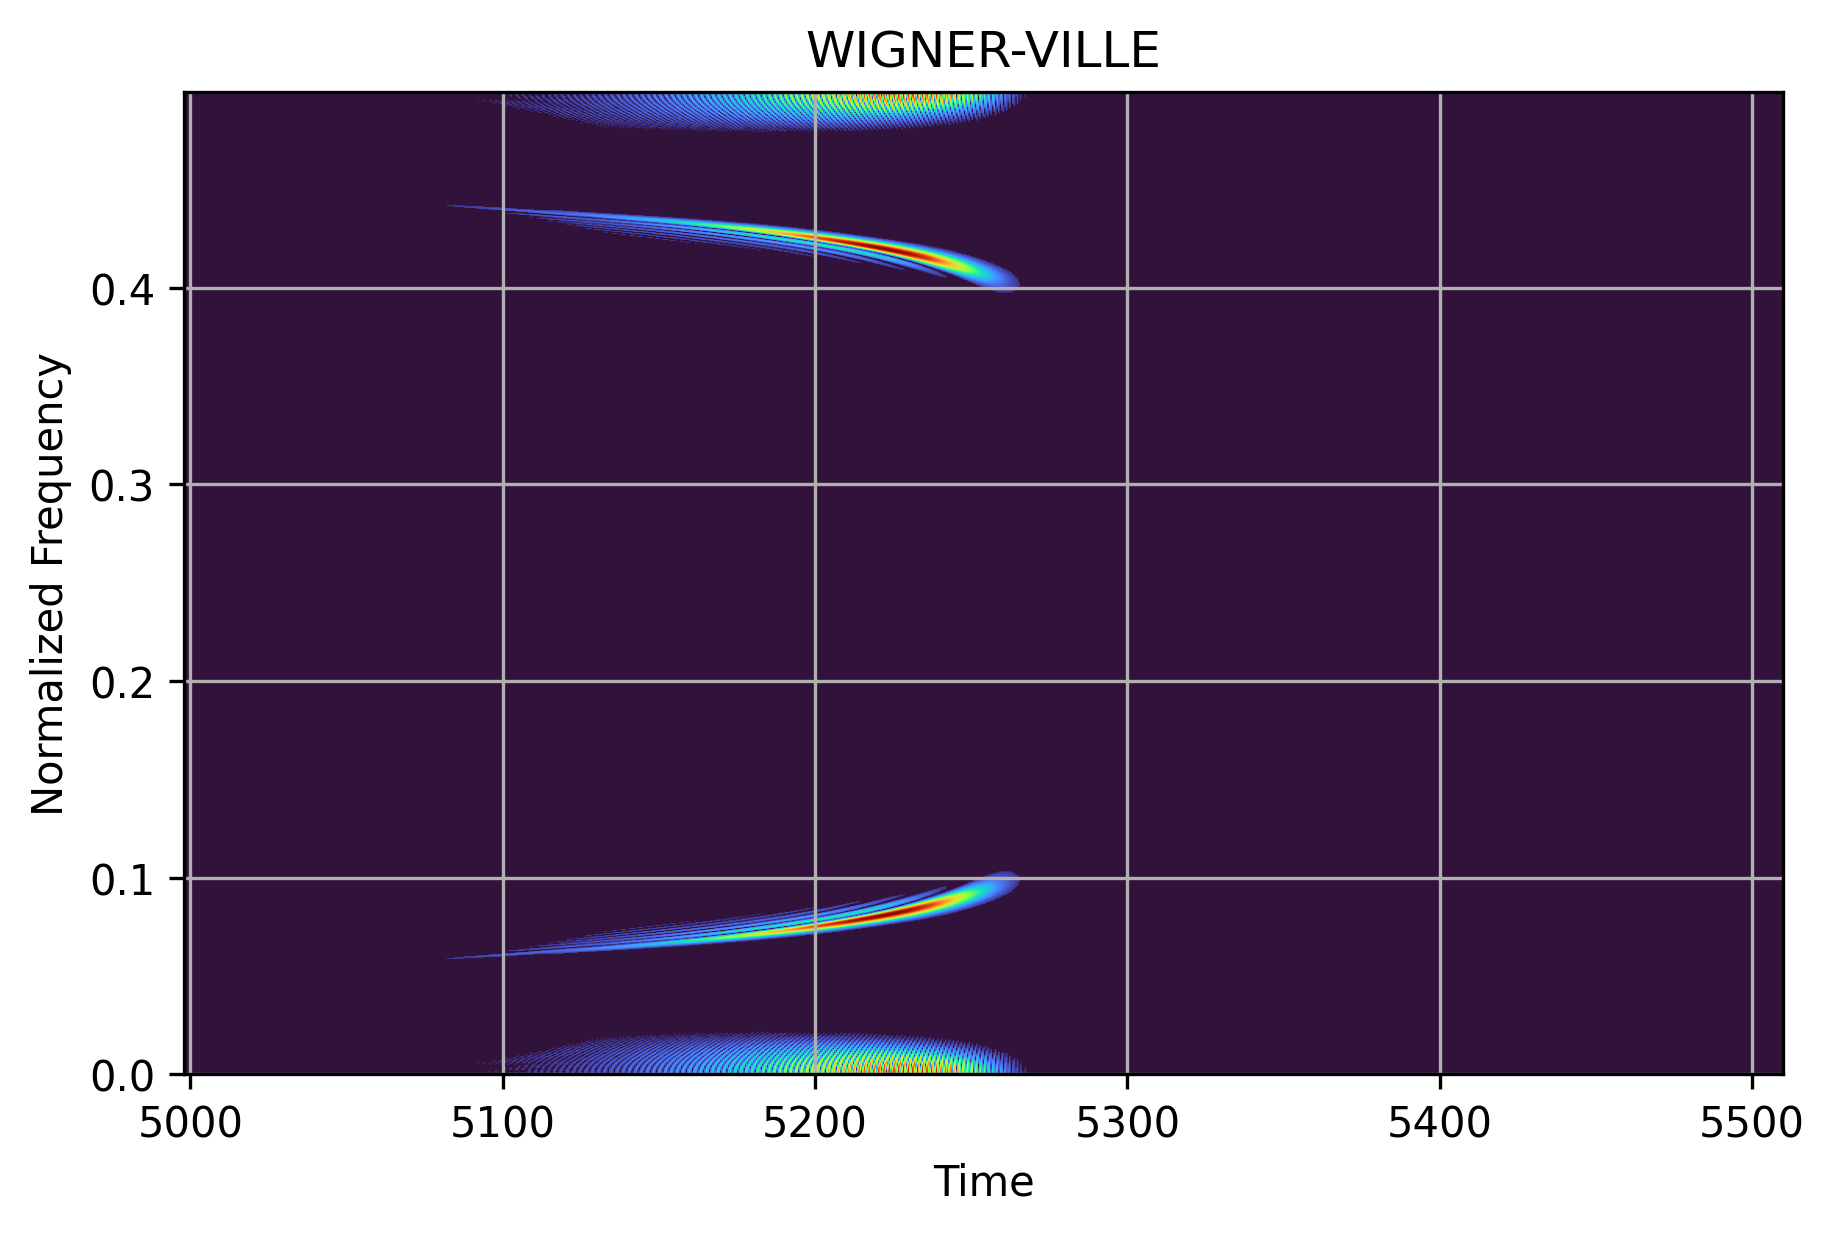

In [2]:
Plot.movie('MS/FLD/e2/', fps=10, res=20)
Plot.wigner_movie('MS/FLD/e2/', fps=10, res=20)